Tutorial 1: Core Operations

In [2]:
# IMPORTS
import cv2
# NOTE: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
# to crash; see https://github.com/jupyter/notebook/issues/3935 as a substitution
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

IMAGE LOADING, SHOWING, AND SAVING

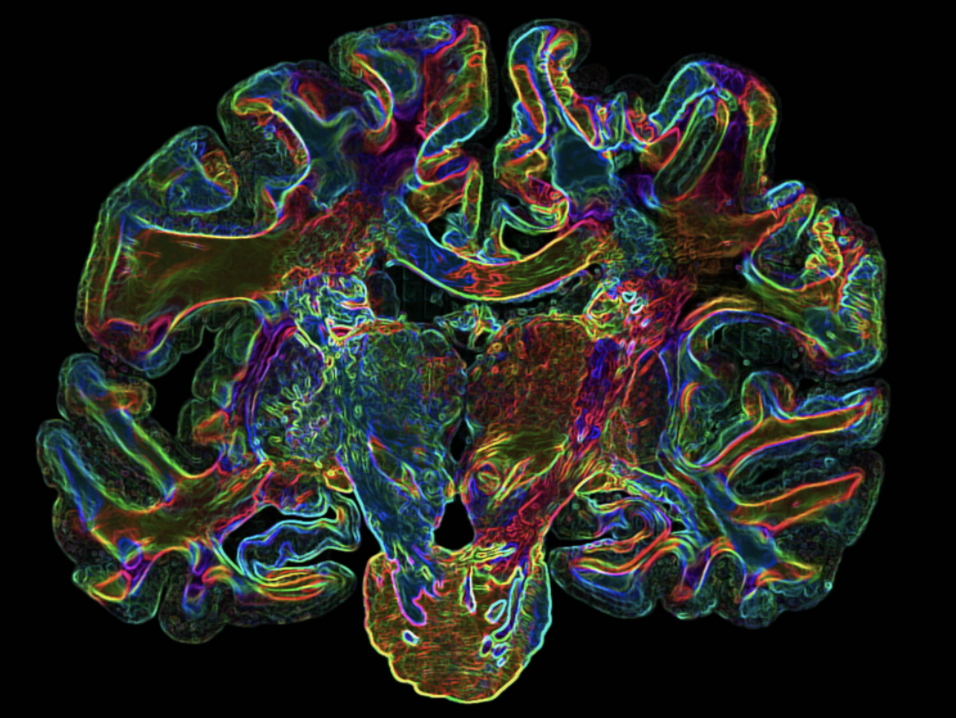

In [5]:
# LOADING AN IMAGE
# access image via GCollab path (folder icon)
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/neurobureau.png")
# prints image
cv2_imshow(img)

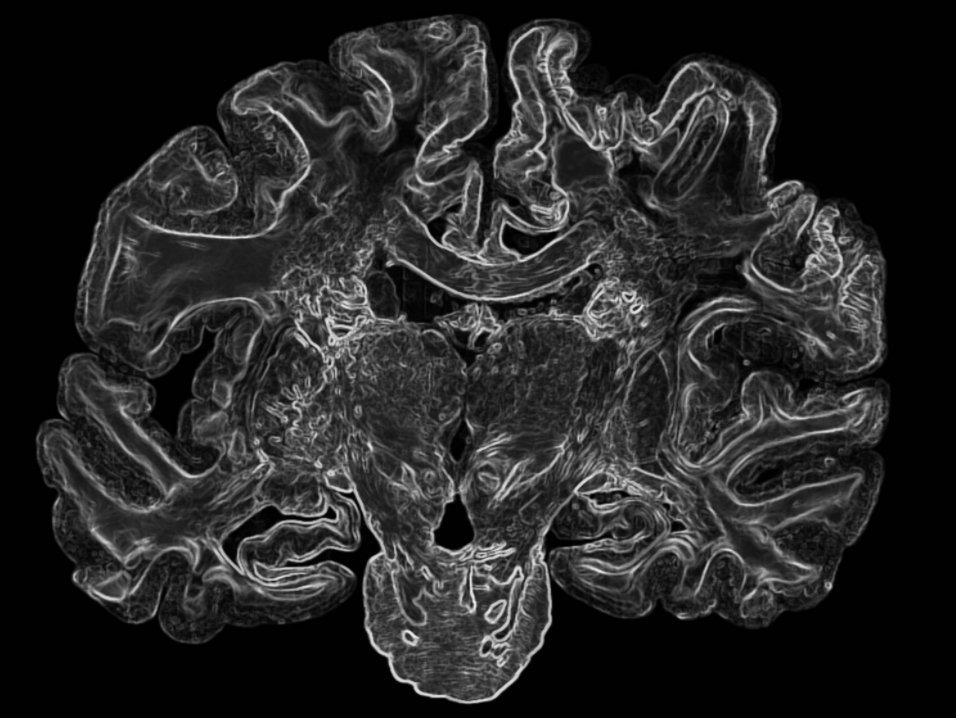

In [ ]:
# making image greyscale
grey_img = cv2.imread("/content/neuro bureau.png",0)
# prints image
cv2_imshow(grey_img)

In [ ]:
# SAVING AN IMAGE (to GCollab folder icon)
cv2.imwrite('grey_img.png',grey_img)

True

[1 1 1]


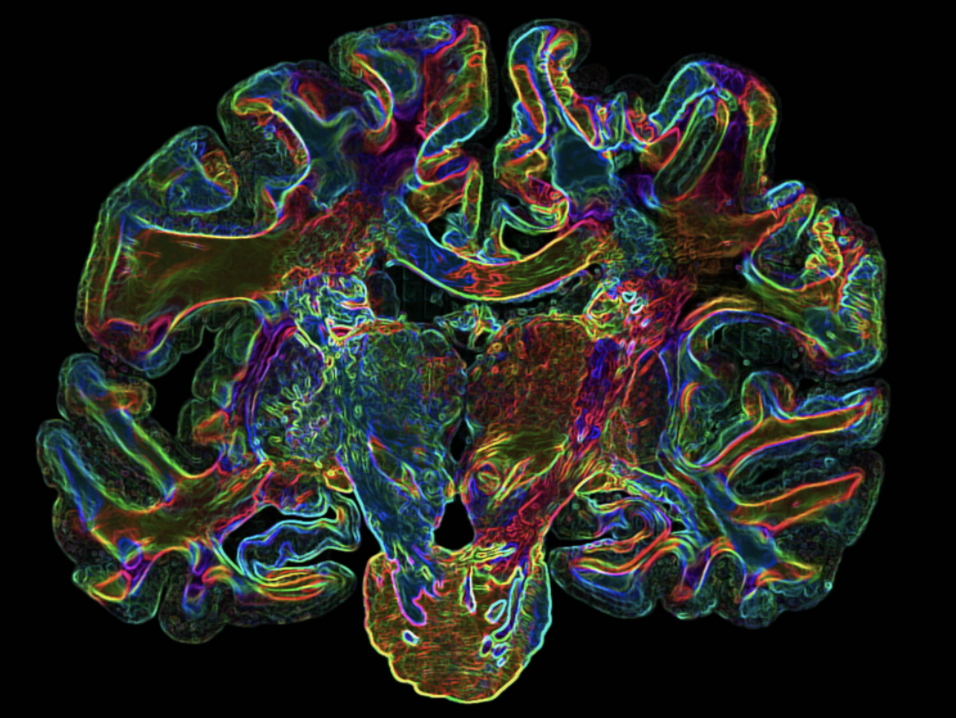

In [ ]:
# accessing pixel value via (row, col) -> returns an RGB array or intensity if grayscale
px = img[100,100]
print (px)
# prints image for reference
cv2_imshow(img)

In [ ]:
# accessing blue pixels
blue = img[100,100,0]
print (blue)

1


[255 255 255]


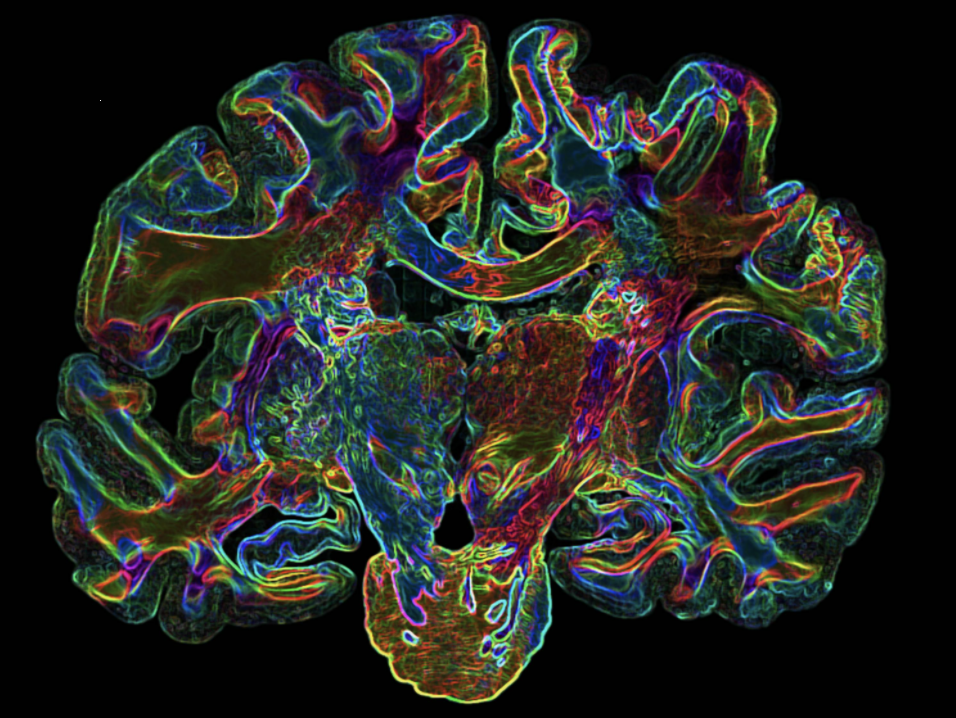

In [ ]:
# manually modifying RGB pixel values (not efficient tho)
img[100,100] = [255,255,255]
print (img[100,100])
# prints image for reference
cv2_imshow(img)

In [ ]:
# more efficient pixel editing method
# accessing RED value
img.item(200,300,2)

68

In [ ]:
# modifying RED value
img.itemset((200,300,2), 100)
img.item(200,300,2)

100

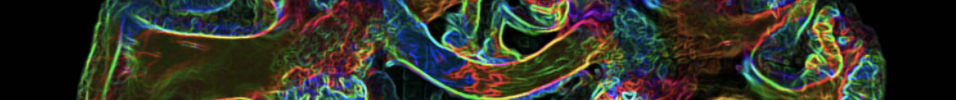

In [ ]:
cv2_imshow(img[200:300])

IMAGE PROPERTIES

In [ ]:
# shape of image 
# if coloured img -> 3 params (row, col, channels)
# if grayscale img -> 2 params (row, col)
print(img.shape)
print(grey_img.shape)

(718, 956, 3)
(718, 956)


In [ ]:
# total # of pixels
print(img.size)

2059224


In [ ]:
# image datatype (also: very helpful for debugging in case of invalid datatype)
print(img.dtype)

uint8


IMAGE ROI (REGION OF INTEREST)

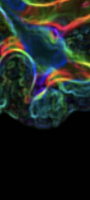

In [ ]:
# NUMPY INDEXING TO FIND A REGION OF INTEREST IN AN IMAGE (IE. EYES FROM FACE)
midbrain = img[500:700, 710:800]
cv2_imshow(midbrain)

SPLITTING AND MERGING IMAGE CHANNELS

In [ ]:
b, g, r = cv2.split(img)
img = cv2.merge((b,g,r))

# or (more efficient than numpy indexing)
b = img[:,:,0]

PADDING (MAKING BORDERS FOR IMAGES)

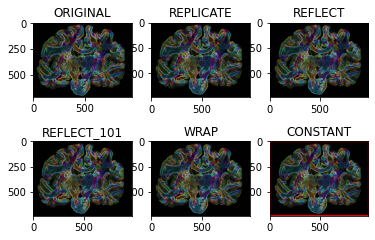

In [ ]:
BLUE = [255,0,0]
replicate = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

In [ ]:
# make subplot bigger: https://stackoverflow.com/questions/51067550/how-to-make-subplots-bigger-in-python

ARITHMETIC OPERATIONS ON IMAGES

IMAGE ADDITION

In [3]:
# OpenCV Addition (saturated operation - BETTER than Numpy Addition)
x = np.uint8([100])
y = np.uint8([10])
print(cv2.add(x,y))

[[110]]


In [4]:
# Numpy Addition (modulo operation)
print (x+y)

[110]


In [ ]:
# revisit above ^^^^

IMAGE BLENDING

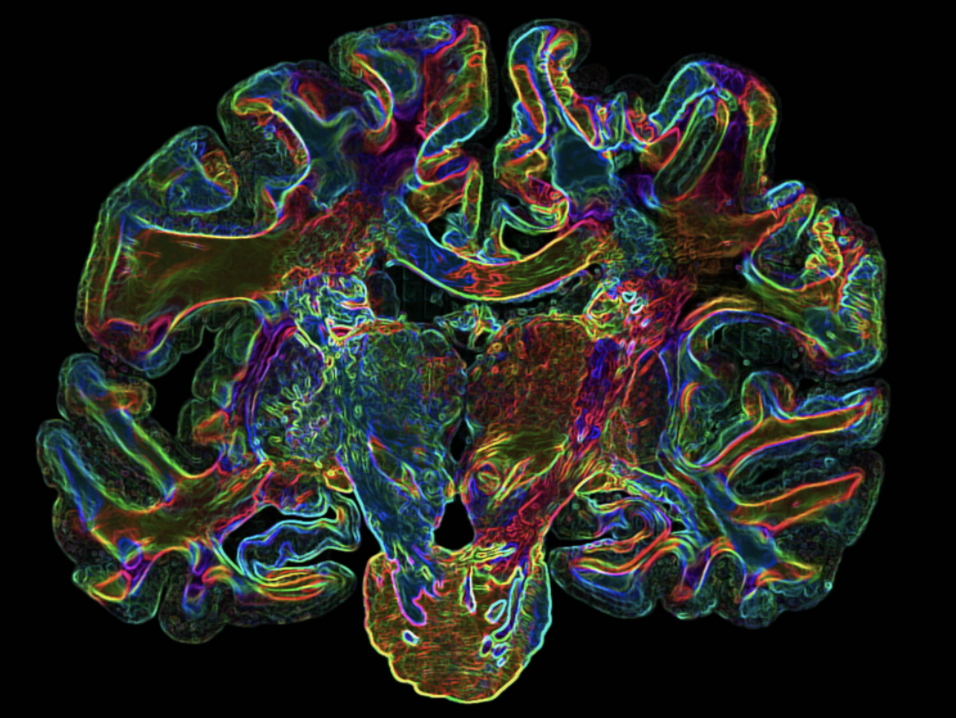

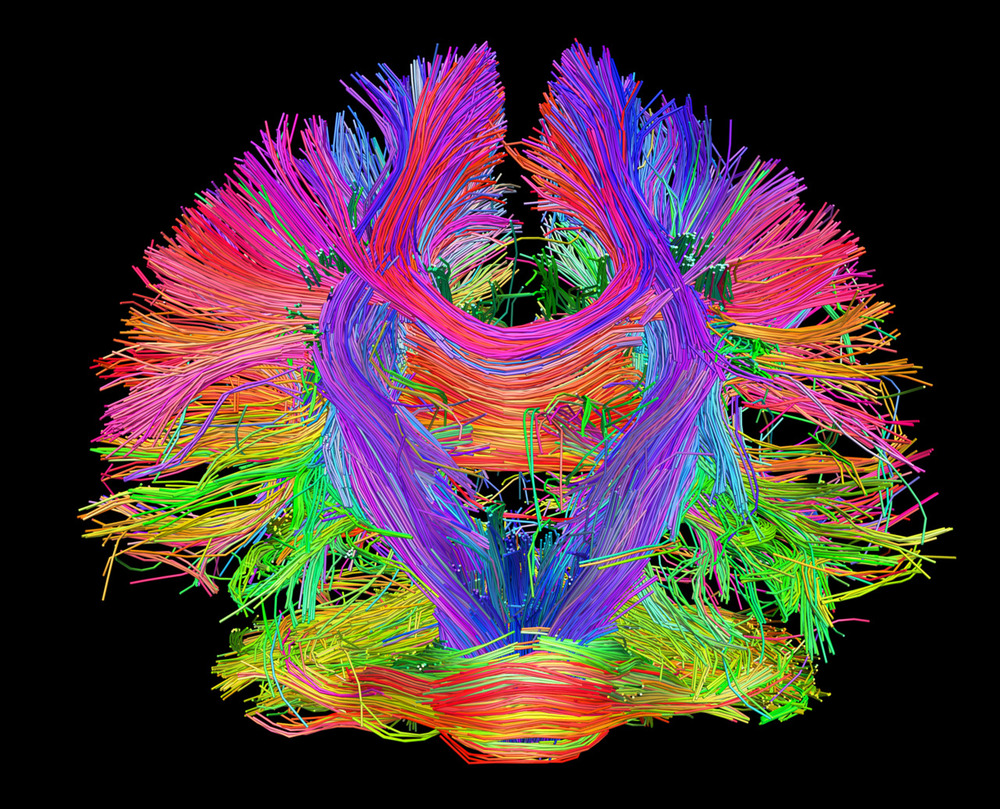

In [15]:
# LOADING 2 IMAGES TO BE BLENDED
img1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/neurobureau.png")
img2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/connectome.jpg")
cv2_imshow(img1)
cv2_imshow(img2)

In [17]:
print(img1.shape)
print(img2.shape)

(718, 956, 3)
(809, 1000, 3)


RESIZING IMAGE (to make both same sizes of input for image blending - otherwise a bug)

In [19]:
print("Original Dimensions:", img2.shape)

# target width (row) and height (col)
width = 956
height = 718
dim = (width, height)

resized_img2 = cv2.resize(img2, dim, interpolation=cv2.INTER_AREA)

print("Resized Target Dimensions:", resized_img2.shape)

Original Dimensions: (809, 1000, 3)
Resized Target Dimensions: (718, 956, 3)


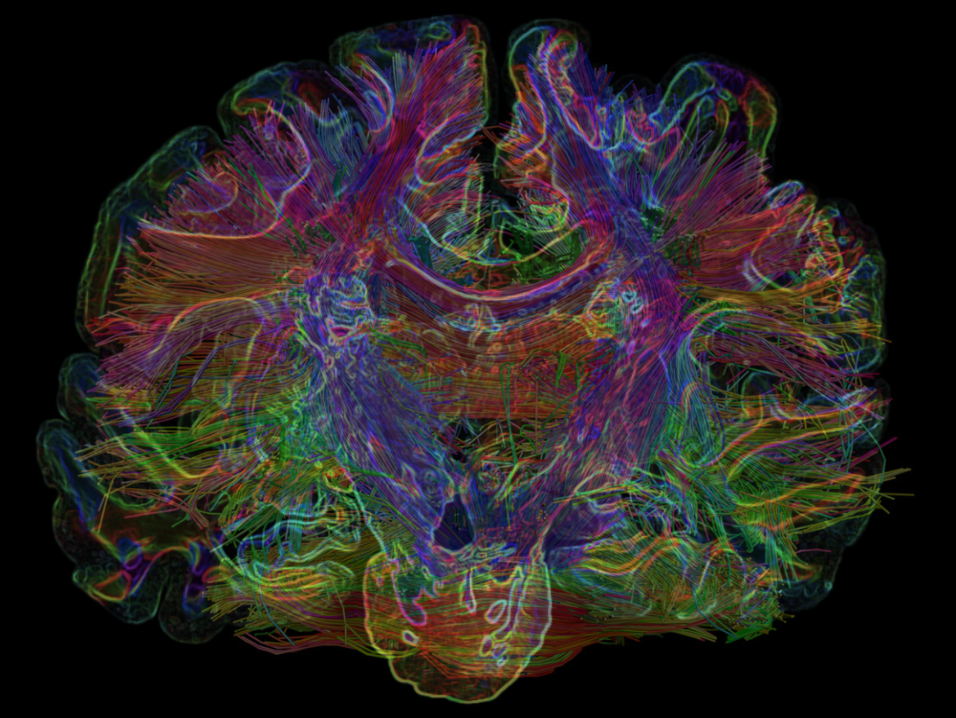

completed image blending operation


In [31]:
dst = cv2.addWeighted(img1,0.5,resized_img2,0.3,0)  # NOTE: has opaque filtering method

cv2_imshow(dst)
# function waits for specified milliseconds for any keyboard event- none in this case
cv2.waitKey(0)
cv2.destroyAllWindows()
print("completed image blending operation")

BITWISE OPERATIONS

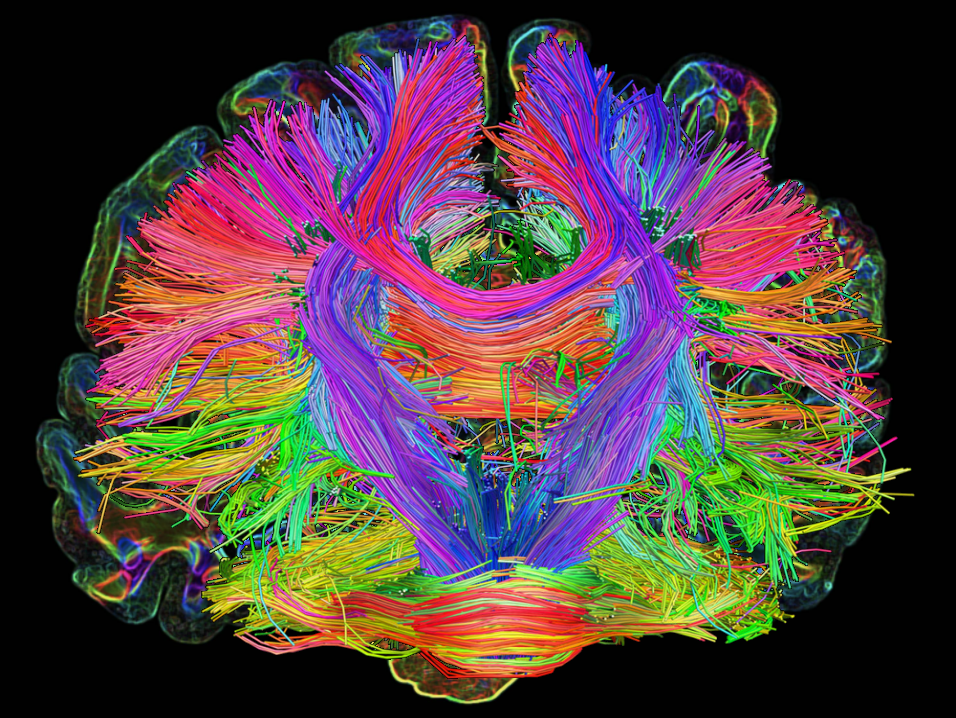

In [34]:
# I want to put logo on top-left corner, So I create a ROI 
rows,cols,channels = resized_img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also  
img2gray = cv2.cvtColor(resized_img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(resized_img2,resized_img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2_imshow(img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# NOTE: images not opaque, they're on top of each other

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
# REVISIT: image blending math AND bitwise operations reading